# Comprehensive Hypothesis Tests in Python for Business Decision Making

*This notebook demonstrates various statistical hypothesis tests using Python,
including assumption checks and interpretations in business contexts.*

## **0. Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm # For ANOVA (optional, provides more detailed output)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set plot style and significance level
sns.set(style="whitegrid")
alpha = 0.05
print(f"Significance Level (alpha) set to: {alpha}")

Significance Level (alpha) set to: 0.05


## **1. Comparing a Sample Mean to a Known Value (One-Sample t-test)**

### **1.1. Scenario**

A fast-food chain claims that the average delivery time for their orders is 30 minutes or less.
Data were collected from a sample of 50 recent deliveries to test this claim.

**Goal:** Determine if the sample data provides enough evidence to refute the chain's claim.

**Metric:** Delivery Time (in minutes).

### **1.2. Hypothesis**

**Null Hypothesis (H₀):** The true average delivery time is 30 minutes (μ = 30).

**Alternative Hypothesis (H₁):** The true average delivery time is greater than 30 minutes (μ > 30).

*Note: This is a one-tailed test because we are specifically interested if the time is **greater** than claimed.*

### **1.3. Data Generation (Synthetic)**

In [3]:
np.random.seed(101)
claimed_mean = 30
sample_size_delivery = 50

In [4]:
# Let's simulate data where the actual mean might be slightly higher, e.g., 32 minutes
actual_mean_simulated = 32
std_dev_delivery = 8
delivery_times = np.random.normal(loc=actual_mean_simulated, scale=std_dev_delivery, size=sample_size_delivery)

In [5]:
# Ensure no negative times
delivery_times[delivery_times < 5] = 5 # Assuming minimum delivery time is 5 mins
delivery_df = pd.DataFrame({'DeliveryTime': delivery_times})

print("\n--- One-Sample t-test: Delivery Times ---")
print(delivery_df.head())
print(f"\nSample Mean: {delivery_df['DeliveryTime'].mean():.2f}")
print(f"Sample Std Dev: {delivery_df['DeliveryTime'].std():.2f}")


--- One-Sample t-test: Delivery Times ---
   DeliveryTime
0     53.654799
1     37.025062
2     39.263756
3     36.030606
4     37.208944

Sample Mean: 34.14
Sample Std Dev: 8.30


In [6]:
delivery_df.describe()

,DeliveryTime
count,50.000000
mean,34.144910
std,8.299648
min,15.854654
25%,28.378740
50%,33.739706
75%,37.403289
max,53.654799


 ### **1.4. Assumption Check: Normality**

 The One-Sample t-test assumes the data is approximately normally distributed.

In [7]:
print("\nChecking Normality (Shapiro-Wilk Test):")
shapiro_stat, shapiro_p = stats.shapiro(delivery_df['DeliveryTime'])
print(f"Shapiro-Wilk Test: Statistics={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
if shapiro_p > alpha:
    print("Interpretation: Data appears normally distributed (fail to reject H₀). Assumption met.")
    normality_met_1samp = True
else:
    print("Interpretation: Data does not appear normally distributed (reject H₀). Assumption not met.")
    print("Consider Wilcoxon Signed-Rank test if assumption severely violated, but t-test is robust for moderate sample sizes.")
    normality_met_1samp = False


Checking Normality (Shapiro-Wilk Test):
Shapiro-Wilk Test: Statistics=0.9713, p-value=0.2615
Interpretation: Data appears normally distributed (fail to reject H₀). Assumption met.


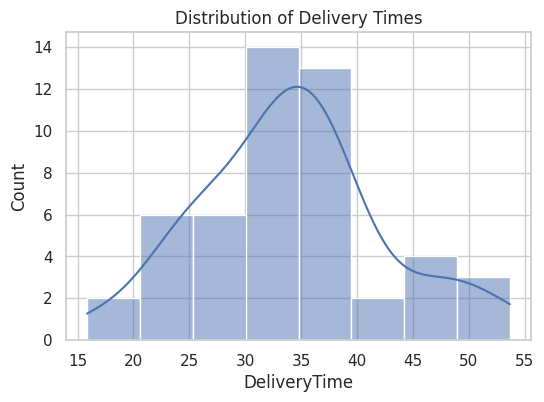

In [8]:
# Visual Check
plt.figure(figsize=(6, 4))
sns.histplot(delivery_df['DeliveryTime'], kde=True)
plt.title('Distribution of Delivery Times')
plt.show()

### **1.5. Performing One-Sample t-test**

We use `scipy.stats.ttest_1samp`. Since H₁ is μ > 30, we use `alternative='greater'`.

In [9]:
t_stat_1samp, p_value_1samp = stats.ttest_1samp(
    a=delivery_df['DeliveryTime'],
    popmean=claimed_mean,
    alternative='greater' # Because H₁ is μ > 30
)

print("\n--- One-Sample t-test Results ---")
print(f"T-statistic: {t_stat_1samp:.4f}")
print(f"P-value (one-tailed): {p_value_1samp:.4f}")


--- One-Sample t-test Results ---
T-statistic: 3.5313
P-value (one-tailed): 0.0005


### **1.6. Interpretation**

In [10]:
print("\n--- Interpretation (One-Sample t-test) ---")
if p_value_1samp < alpha:
    print(f"Conclusion: Reject the Null Hypothesis (H₀).")
    print(f"There is statistically significant evidence (at α={alpha}) to suggest that the average delivery time is greater than 30 minutes.")
    print(f"The sample mean ({delivery_df['DeliveryTime'].mean():.2f} mins) is significantly higher than the claimed 30 minutes.")
else:
    print(f"Conclusion: Fail to Reject the Null Hypothesis (H₀).")
    print(f"There is not enough statistically significant evidence (at α={alpha}) to conclude that the average delivery time is greater than 30 minutes.")



--- Interpretation (One-Sample t-test) ---
Conclusion: Reject the Null Hypothesis (H₀).
There is statistically significant evidence (at α=0.05) to suggest that the average delivery time is greater than 30 minutes.
The sample mean (34.14 mins) is significantly higher than the claimed 30 minutes.


## **2. Comparing Means of Two Independent Groups (Independent Samples t-test / Mann-Whitney U)**

## **2.1. Scenario**

A retail company wants to compare the average spending per visit of customers who use their loyalty card versus those who don't.

**Goal:** Determine if there's a significant difference in average spending between loyalty card users and non-users.

**Metric:** Spending per Visit ($).


### **2.2. Hypotheses**

**Null Hypothesis (H₀):** The mean spending per visit is the same for loyalty card users and non-users (μ_loyalty = μ_non_loyalty).

**Alternative Hypothesis (H₁):** The mean spending per visit is different between the two groups (μ_loyalty ≠ μ_non_loyalty).

*Note: This is a two-tailed test.*

### **2.3. Data Generation (Synthetic)**

In [14]:
np.random.seed(102)
# Group: Loyalty Card Users
n_loyalty = 100
mean_loyalty = 85.50
std_dev_loyalty = 25.0
spending_loyalty = np.random.normal(loc=mean_loyalty, scale=std_dev_loyalty, size=n_loyalty)
spending_loyalty[spending_loyalty < 5] = 5 # Min spending $5

# Group: Non-Loyalty Card Users
n_non_loyalty = 120
mean_non_loyalty = 78.00
std_dev_non_loyalty = 30.0 # Slightly higher variability
spending_non_loyalty = np.random.normal(loc=mean_non_loyalty, scale=std_dev_non_loyalty, size=n_non_loyalty)
spending_non_loyalty[spending_non_loyalty < 5] = 5

# Combine into DataFrame
df_loyalty = pd.DataFrame({'Group': 'Loyalty', 'Spending': spending_loyalty})
df_non_loyalty = pd.DataFrame({'Group': 'NonLoyalty', 'Spending': spending_non_loyalty})
spending_df = pd.concat([df_loyalty, df_non_loyalty], ignore_index=True)


In [15]:
print("\n--- Independent Samples: Customer Spending ---")
spending_df.head()


--- Independent Samples: Customer Spending ---


,Group,Spending
0,Loyalty,127.201707
1,Loyalty,108.646545
2,Loyalty,111.949919
3,Loyalty,62.491525
4,Loyalty,117.993712


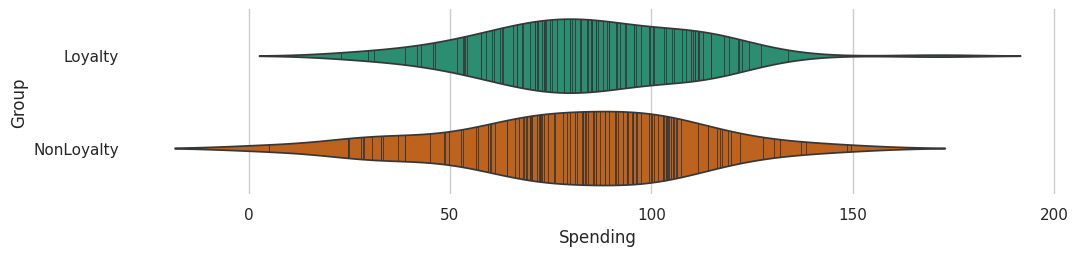

In [20]:
# Group vs Spending Graph
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(spending_df['Group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(spending_df, x='Spending', y='Group', inner='stick', palette='Dark2', hue='Group', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

### **2.4. Assumption Checks**

1. Independence: Assumed based on sampling different customers.

2. Normality (Shapiro-Wilk Test for each group)

In [21]:
print("Normality Check:")
shapiro_loyalty = stats.shapiro(spending_df[spending_df['Group'] == 'Loyalty']['Spending'])
shapiro_non_loyalty = stats.shapiro(spending_df[spending_df['Group'] == 'NonLoyalty']['Spending'])
print(f"Loyalty Group: Statistics={shapiro_loyalty.statistic:.4f}, p-value={shapiro_loyalty.pvalue:.4f}")
print(f"Non-Loyalty Group: Statistics={shapiro_non_loyalty.statistic:.4f}, p-value={shapiro_non_loyalty.pvalue:.4f}")

normality_met_indep = shapiro_loyalty.pvalue > alpha and shapiro_non_loyalty.pvalue > alpha
if normality_met_indep:
    print("Interpretation: Both groups appear normally distributed.")
else:
    print("Interpretation: At least one group does not appear normally distributed.")

Normality Check:
Loyalty Group: Statistics=0.9895, p-value=0.6254
Non-Loyalty Group: Statistics=0.9830, p-value=0.1349
Interpretation: Both groups appear normally distributed.


### **Homogeneity of Variances (Levene's Test)**

In [22]:
print("\nHomogeneity of Variances Check (Levene's Test):")
levene_stat, levene_p = stats.levene(
    spending_df[spending_df['Group'] == 'Loyalty']['Spending'],
    spending_df[spending_df['Group'] == 'NonLoyalty']['Spending']
)
print(f"Levene's Test: Statistics={levene_stat:.4f}, p-value={levene_p:.4f}")


Homogeneity of Variances Check (Levene's Test):
Levene's Test: Statistics=2.4570, p-value=0.1185


In [23]:
equal_variance_met = levene_p > alpha
if equal_variance_met:
    print("Interpretation: Variances are assumed equal.")
else:
    print("Interpretation: Variances are not assumed equal.")

Interpretation: Variances are assumed equal.


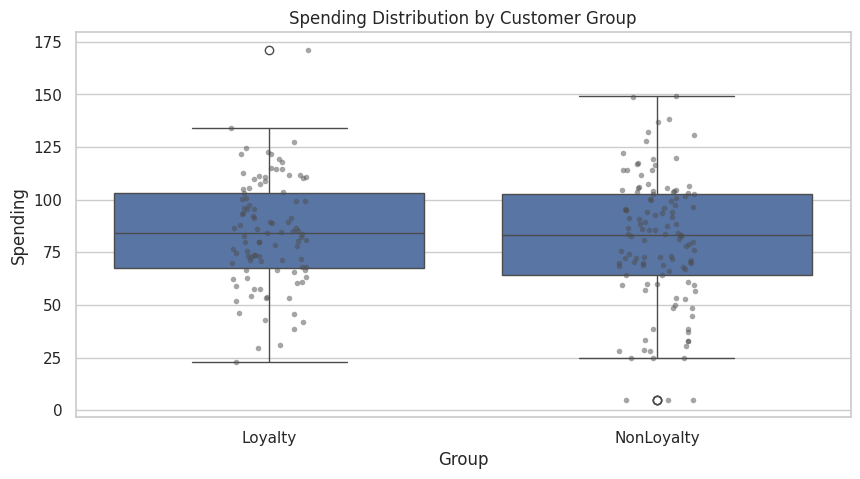

In [24]:
# Visual Check
plt.figure(figsize=(10, 5))
sns.boxplot(x='Group', y='Spending', data=spending_df)
plt.title('Spending Distribution by Customer Group')
sns.stripplot(x='Group', y='Spending', data=spending_df, color=".3", size=4, alpha=0.5) # Add individual points
plt.show()

 ### **2.5. Performing Statistical Test**

In [29]:
print("\n--- Performing Statistical Test (Independent Samples) ---")
if normality_met_indep:
    print("Using Independent Samples t-test.")
    # Use Welch's t-test if variances are unequal (`equal_var=False`)
    t_stat_indep, p_value_indep = stats.ttest_ind(
        spending_df[spending_df['Group'] == 'Loyalty']['Spending'],
        spending_df[spending_df['Group'] == 'NonLoyalty']['Spending'],
        equal_var=equal_variance_met, # Set based on Levene's test
        alternative='two-sided'
    )
    test_used = "Standard t-test" if equal_variance_met else "Welch's t-test"
    print(f"Test Used: {test_used}")
    print(f"T-statistic: {t_stat_indep:.4f}")
    print(f"P-value: {p_value_indep:.4f}")
    p_value_final_indep = p_value_indep
else:
    print("Normality assumption not met. Using Mann-Whitney U test.")
    u_stat, p_value_mw = stats.mannwhitneyu(
        spending_df[spending_df['Group'] == 'Loyalty']['Spending'],
        spending_df[spending_df['Group'] == 'NonLoyalty']['Spending'],
        alternative='two-sided'
    )
    print("Test Used: Mann-Whitney U test")
    print(f"U-statistic: {u_stat:.4f}")
    print(f"P-value: {p_value_mw:.4f}")
    p_value_final_indep = p_value_mw


--- Performing Statistical Test (Independent Samples) ---
Using Independent Samples t-test.
Test Used: Standard t-test
T-statistic: 0.9928
P-value: 0.3219


### **2.6. Interpretation**

In [32]:
print("\n--- Interpretation (Independent Samples) ---")
if p_value_final_indep < alpha:
    print(f"Conclusion: Reject the Null Hypothesis (H₀).")
    print(f"There is a statistically significant difference (at α={alpha}) in average spending per visit between loyalty card users and non-users.")
    # Compare means/medians
    mean_l = spending_df[spending_df['Group'] == 'Loyalty']['Spending'].mean()
    mean_nl = spending_df[spending_df['Group'] == 'NonLoyalty']['Spending'].mean()
    median_l = spending_df[spending_df['Group'] == 'Loyalty']['Spending'].median()
    median_nl = spending_df[spending_df['Group'] == 'NonLoyalty']['Spending'].median()
    print(f"Mean Spending: Loyalty=${mean_l:.2f}, Non-Loyalty=${mean_nl:.2f}")
    print(f"Median Spending: Loyalty=${median_l:.2f}, Non-Loyalty=${median_nl:.2f}")
    if mean_l > mean_nl: # Or compare medians if Mann-Whitney was used
         print("Loyalty card users tend to spend significantly more per visit.")
    else:
         print("Non-loyalty card users tend to spend significantly more per visit.")

else:
    print(f"Conclusion: Fail to Reject the Null Hypothesis (H₀).")
    print(f"There is not enough statistically significant evidence (at α={alpha}) to conclude a difference in average spending per visit between the two groups.")


--- Interpretation (Independent Samples) ---
Conclusion: Fail to Reject the Null Hypothesis (H₀).
There is not enough statistically significant evidence (at α=0.05) to conclude a difference in average spending per visit between the two groups.


## **3. Comparing Means of Two Related Groups (Paired Samples t-test / Wilcoxon Signed-Rank)**


### **3.1. Scenario**

A company implements a new training program for its sales team. They measure the sales performance (e.g., number of deals closed) for a sample of salespeople *before* and *after* the training.


**Goal:** Determine if the training program significantly improved sales performance.
#

**Metric:** Number of Deals Closed (per month).

### **3.2. Hypotheses**

**Null Hypothesis (H₀):** There is no difference in the mean number of deals closed before and after the training (μ_diff = 0, where diff = after - before).

**Alternative Hypothesis (H₁):** The mean number of deals closed is higher after the training (μ_diff > 0).

*Note: This is a one-tailed test because we expect improvement.*

### **3.3. Data Generation (Synthetic)**

In [33]:
np.random.seed(103)
n_salespeople = 40
# Before training scores
mean_before = 15
std_dev_before = 4
sales_before = np.random.normal(loc=mean_before, scale=std_dev_before, size=n_salespeople).astype(int)
sales_before[sales_before < 0] = 0

In [34]:
# After training scores - simulate an improvement + individual variability
improvement = np.random.normal(loc=3, scale=2, size=n_salespeople) # Average improvement of 3 deals
sales_after = (sales_before + improvement).astype(int)
sales_after[sales_after < 0] = 0

In [35]:
# Create DataFrame
paired_df = pd.DataFrame({
    'SalespersonID': range(1, n_salespeople + 1),
    'Deals_Before': sales_before,
    'Deals_After': sales_after
})
paired_df['Difference'] = paired_df['Deals_After'] - paired_df['Deals_Before']

print("\n--- Paired Samples: Sales Performance ---")
print(paired_df.head())
print(f"\nMean Difference (After - Before): {paired_df['Difference'].mean():.2f}")



--- Paired Samples: Sales Performance ---
   SalespersonID  Deals_Before  Deals_After  Difference
0              1            10           14           4
1              2            13           19           6
2              3            16           21           5
3              4            13           16           3
4              5            10           11           1

Mean Difference (After - Before): 2.73


### **3.4. Assumption Check: Normality of Differences**

The Paired Samples t-test assumes the *differences* between the paired observations are normally distributed.

In [36]:
print("\n--- Assumption Check (Paired Samples) ---")
print("Normality Check of Differences (Shapiro-Wilk Test):")
shapiro_diff_stat, shapiro_diff_p = stats.shapiro(paired_df['Difference'])
print(f"Shapiro-Wilk Test: Statistics={shapiro_diff_stat:.4f}, p-value={shapiro_diff_p:.4f}")

normality_met_paired = shapiro_diff_p > alpha
if normality_met_paired:
    print("Interpretation: Differences appear normally distributed.")
else:
    print("Interpretation: Differences do not appear normally distributed.")



--- Assumption Check (Paired Samples) ---
Normality Check of Differences (Shapiro-Wilk Test):
Shapiro-Wilk Test: Statistics=0.9489, p-value=0.0697
Interpretation: Differences appear normally distributed.


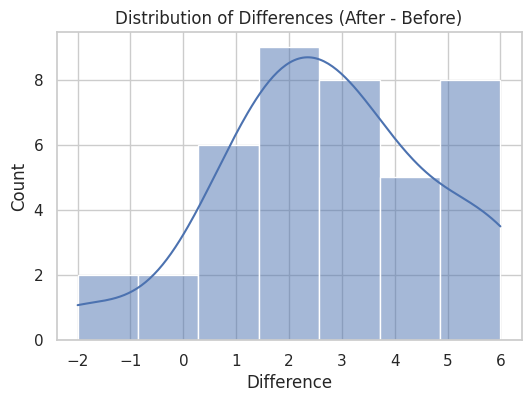

In [37]:
# Visual Check
plt.figure(figsize=(6, 4))
sns.histplot(paired_df['Difference'], kde=True)
plt.title('Distribution of Differences (After - Before)')
plt.show()

### **3.5. Performing Statistical Test**

In [38]:
print("\n--- Performing Statistical Test (Paired Samples) ---")
if normality_met_paired:
    print("Using Paired Samples t-test.")
    t_stat_paired, p_value_paired = stats.ttest_rel(
        a=paired_df['Deals_After'],
        b=paired_df['Deals_Before'],
        alternative='greater' # Because H₁ is μ_diff > 0
    )
    print(f"Test Used: Paired Samples t-test")
    print(f"T-statistic: {t_stat_paired:.4f}")
    print(f"P-value (one-tailed): {p_value_paired:.4f}")
    p_value_final_paired = p_value_paired
else:
    print("Normality assumption not met. Using Wilcoxon Signed-Rank test.")
    # Ensure no zero differences if using Wilcoxon (or handle them)
    non_zero_diffs = paired_df['Difference'][paired_df['Difference'] != 0]
    if len(non_zero_diffs) < len(paired_df['Difference']):
         print(f"Note: {len(paired_df['Difference']) - len(non_zero_diffs)} zero differences excluded for Wilcoxon test.")

    # Scipy's Wilcoxon performs a two-sided test by default.
    # For one-sided, we can compare the statistic or adjust the p-value.
    # Let's use the 'greater' alternative directly if available, or adjust p-value.
    try:
        # Check if the version of scipy supports the 'alternative' parameter for wilcoxon
        w_stat, p_value_wilcoxon = stats.wilcoxon(
             paired_df['Difference'], # Use differences directly
             alternative='greater'
        )
    except TypeError:
         # Older scipy: perform two-sided and adjust p-value
         print("Older scipy version detected, performing two-sided Wilcoxon and adjusting p-value.")
         w_stat, p_value_wilcoxon_two_sided = stats.wilcoxon(paired_df['Difference'])
         # If W is positive (indicating 'After' tends to be higher), p_one_sided = p_two_sided / 2
         # If W is negative, p_one_sided = 1 - (p_two_sided / 2) - check median sign
         median_diff = paired_df['Difference'].median()
         if median_diff > 0 :
             p_value_wilcoxon = p_value_wilcoxon_two_sided / 2
         elif median_diff < 0:
              p_value_wilcoxon = 1.0 - (p_value_wilcoxon_two_sided / 2)
         else: # Median diff is 0, hard to say direction
             p_value_wilcoxon = p_value_wilcoxon_two_sided # Be conservative

    print("Test Used: Wilcoxon Signed-Rank test")
    print(f"W-statistic: {w_stat:.4f}")
    print(f"P-value (one-tailed): {p_value_wilcoxon:.4f}")
    p_value_final_paired = p_value_wilcoxon


--- Performing Statistical Test (Paired Samples) ---
Using Paired Samples t-test.
Test Used: Paired Samples t-test
T-statistic: 8.5095
P-value (one-tailed): 0.0000


### **3.6. Interpretation**

In [39]:
print("\n--- Interpretation (Paired Samples) ---")
if p_value_final_paired < alpha:
    print(f"Conclusion: Reject the Null Hypothesis (H₀).")
    print(f"There is statistically significant evidence (at α={alpha}) that the sales training program improved performance.")
    print(f"The average number of deals closed after training ({paired_df['Deals_After'].mean():.2f}) is significantly higher than before ({paired_df['Deals_Before'].mean():.2f}).")
else:
    print(f"Conclusion: Fail to Reject the Null Hypothesis (H₀).")
    print(f"There is not enough statistically significant evidence (at α={alpha}) to conclude that the sales training program improved performance.")



--- Interpretation (Paired Samples) ---
Conclusion: Reject the Null Hypothesis (H₀).
There is statistically significant evidence (at α=0.05) that the sales training program improved performance.
The average number of deals closed after training (17.00) is significantly higher than before (14.28).


## **4. Comparing Means of More Than Two Independent Groups (ANOVA / Kruskal-Wallis)**

### **4.1. Scenario**

A marketing team tested three different advertising campaigns (Campaign A, Campaign B, Campaign C) on different, comparable customer segments. They measured the resulting 'Customer Lifetime Value' (CLV) attributed to each campaign after 6 months.

**Goal:** Determine if there is a significant difference in the mean CLV generated by the three campaigns.

**Metric:** Customer Lifetime Value (CLV) ($).

### **4.2. Hypotheses**

**Null Hypothesis (H₀):** The mean CLV is the same for all three campaigns (μ_A = μ_B = μ_C).

**Alternative Hypothesis (H₁):** At least one campaign has a different mean CLV than the others.

*Note: ANOVA is an omnibus test; a significant result tells us there's a difference, but not which groups differ.*

### **4.3. Data Generation (Synthetic)**

In [40]:
np.random.seed(104)
n_per_group = 75
# Campaign A
clv_A = np.random.normal(loc=500, scale=150, size=n_per_group)
# Campaign B (Slightly better)
clv_B = np.random.normal(loc=560, scale=160, size=n_per_group)
# Campaign C
clv_C = np.random.normal(loc=510, scale=140, size=n_per_group)

# Ensure no negative CLV
clv_A[clv_A < 0] = 0
clv_B[clv_B < 0] = 0
clv_C[clv_C < 0] = 0

# Combine into DataFrame
df_A = pd.DataFrame({'Campaign': 'A', 'CLV': clv_A})
df_B = pd.DataFrame({'Campaign': 'B', 'CLV': clv_B})
df_C = pd.DataFrame({'Campaign': 'C', 'CLV': clv_C})
clv_df = pd.concat([df_A, df_B, df_C], ignore_index=True)

print("\n--- ANOVA/Kruskal-Wallis: Campaign CLV ---")
print(clv_df.head())
print("\nSummary Statistics per Campaign:")
print(clv_df.groupby('Campaign')['CLV'].describe())


--- ANOVA/Kruskal-Wallis: Campaign CLV ---
  Campaign         CLV
0        A  437.268015
1        A  418.709958
2        A  408.813515
3        A  639.134994
4        A  584.361808

Summary Statistics per Campaign:
          count        mean         std         min         25%         50%  \
Campaign                                                                      
A          75.0  495.886141  132.646611  163.425829  402.827001  469.495844   
B          75.0  560.806750  153.500038  193.387807  450.010818  571.051514   
C          75.0  491.764359  136.438281  202.047872  390.335411  497.380488   

                 75%          max  
Campaign                           
A         595.596238   825.862505  
B         656.710195  1096.093034  
C         603.224374   785.582854  


### **4.4. Assumption Checks**

1. Independence: Assumed (different customer segments).
2. Normality (Shapiro-Wilk Test for each group)

In [42]:
print("Normality Check:")
shapiro_A = stats.shapiro(clv_df[clv_df['Campaign'] == 'A']['CLV'])
shapiro_B = stats.shapiro(clv_df[clv_df['Campaign'] == 'B']['CLV'])
shapiro_C = stats.shapiro(clv_df[clv_df['Campaign'] == 'C']['CLV'])
print(f"Campaign A: Statistics={shapiro_A.statistic:.4f}, p-value={shapiro_A.pvalue:.4f}")
print(f"Campaign B: Statistics={shapiro_B.statistic:.4f}, p-value={shapiro_B.pvalue:.4f}")
print(f"Campaign C: Statistics={shapiro_C.statistic:.4f}, p-value={shapiro_C.pvalue:.4f}")

normality_met_anova = (shapiro_A.pvalue > alpha) and (shapiro_B.pvalue > alpha) and (shapiro_C.pvalue > alpha)
if normality_met_anova:
    print("Interpretation: All groups appear normally distributed.")
else:
    print("Interpretation: At least one group does not appear normally distributed.")

Normality Check:
Campaign A: Statistics=0.9773, p-value=0.1968
Campaign B: Statistics=0.9822, p-value=0.3739
Campaign C: Statistics=0.9833, p-value=0.4264
Interpretation: All groups appear normally distributed.


### **Homogeneity of Variances (Levene's Test)**

In [43]:
print("\nHomogeneity of Variances Check (Levene's Test):")
levene_stat_anova, levene_p_anova = stats.levene(
    clv_df[clv_df['Campaign'] == 'A']['CLV'],
    clv_df[clv_df['Campaign'] == 'B']['CLV'],
    clv_df[clv_df['Campaign'] == 'C']['CLV']
)
print(f"Levene's Test: Statistics={levene_stat_anova:.4f}, p-value={levene_p_anova:.4f}")

equal_variance_met_anova = levene_p_anova > alpha
if equal_variance_met_anova:
    print("Interpretation: Variances are assumed equal.")
else:
    print("Interpretation: Variances are not assumed equal.")
    if normality_met_anova:
         print("Note: ANOVA is somewhat robust to violations of equal variance if group sizes are equal.")
         print("Consider Welch's ANOVA if variances are very different.")


Homogeneity of Variances Check (Levene's Test):
Levene's Test: Statistics=0.5568, p-value=0.5738
Interpretation: Variances are assumed equal.


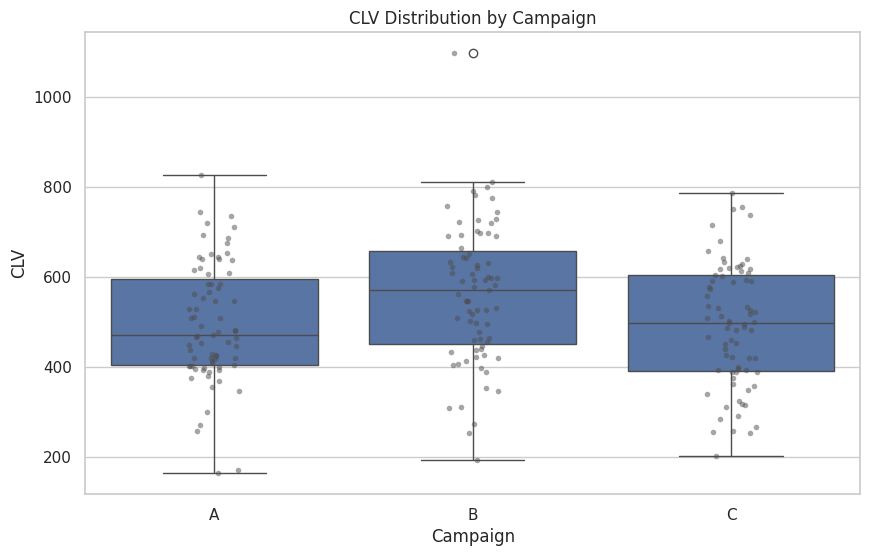

In [44]:
# Visual Check
plt.figure(figsize=(10, 6))
sns.boxplot(x='Campaign', y='CLV', data=clv_df)
plt.title('CLV Distribution by Campaign')
sns.stripplot(x='Campaign', y='CLV', data=clv_df, color=".3", size=4, alpha=0.5)
plt.show()

### **4.5. Performing Statistical Test**

In [45]:
print("\n--- Performing Statistical Test (ANOVA / Kruskal-Wallis) ---")
if normality_met_anova and equal_variance_met_anova:
    print("Using One-Way ANOVA.")
    f_stat, p_value_anova = stats.f_oneway(
        clv_df[clv_df['Campaign'] == 'A']['CLV'],
        clv_df[clv_df['Campaign'] == 'B']['CLV'],
        clv_df[clv_df['Campaign'] == 'C']['CLV']
    )
    print("Test Used: One-Way ANOVA")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value_anova:.4f}")
    p_value_final_groups = p_value_anova
    test_used_groups = "ANOVA"

elif normality_met_anova and not equal_variance_met_anova:
     print("Normality met but variances unequal. Standard ANOVA may be okay with equal samples, but Kruskal-Wallis is safer.")
     print("Alternatively, consider Welch's ANOVA (not directly in scipy.stats, requires statsmodels or other packages).")
     print("Proceeding with Kruskal-Wallis as a robust non-parametric alternative.")
     h_stat, p_value_kw = stats.kruskal(
        clv_df[clv_df['Campaign'] == 'A']['CLV'],
        clv_df[clv_df['Campaign'] == 'B']['CLV'],
        clv_df[clv_df['Campaign'] == 'C']['CLV']
     )
     print("Test Used: Kruskal-Wallis Test")
     print(f"H-statistic: {h_stat:.4f}")
     print(f"P-value: {p_value_kw:.4f}")
     p_value_final_groups = p_value_kw
     test_used_groups = "Kruskal-Wallis"

else: # Normality not met
    print("Normality assumption not met. Using Kruskal-Wallis Test.")
    h_stat, p_value_kw = stats.kruskal(
        clv_df[clv_df['Campaign'] == 'A']['CLV'],
        clv_df[clv_df['Campaign'] == 'B']['CLV'],
        clv_df[clv_df['Campaign'] == 'C']['CLV']
    )
    print("Test Used: Kruskal-Wallis Test")
    print(f"H-statistic: {h_stat:.4f}")
    print(f"P-value: {p_value_kw:.4f}")
    p_value_final_groups = p_value_kw
    test_used_groups = "Kruskal-Wallis"


--- Performing Statistical Test (ANOVA / Kruskal-Wallis) ---
Using One-Way ANOVA.
Test Used: One-Way ANOVA
F-statistic: 5.6455
P-value: 0.0041


### **4.6. Interpretation**

In [46]:
print("\n--- Interpretation (ANOVA / Kruskal-Wallis) ---")
if p_value_final_groups < alpha:
    print(f"Conclusion: Reject the Null Hypothesis (H₀).")
    print(f"There is a statistically significant difference (at α={alpha}) in the mean (or median for Kruskal-Wallis) CLV among the three campaigns.")
    print("Further post-hoc tests (e.g., Tukey's HSD for ANOVA, Dunn's test for Kruskal-Wallis) are needed to determine which specific campaigns differ from each other.")

    # Example: Mentioning means/medians
    print("\nGroup Means:")
    print(clv_df.groupby('Campaign')['CLV'].mean())
    print("\nGroup Medians:")
    print(clv_df.groupby('Campaign')['CLV'].median())

else:
    print(f"Conclusion: Fail to Reject the Null Hypothesis (H₀).")
    print(f"There is not enough statistically significant evidence (at α={alpha}) to conclude a difference in the mean (or median) CLV among the three campaigns.")



--- Interpretation (ANOVA / Kruskal-Wallis) ---
Conclusion: Reject the Null Hypothesis (H₀).
There is a statistically significant difference (at α=0.05) in the mean (or median for Kruskal-Wallis) CLV among the three campaigns.
Further post-hoc tests (e.g., Tukey's HSD for ANOVA, Dunn's test for Kruskal-Wallis) are needed to determine which specific campaigns differ from each other.

Group Means:
Campaign
A    495.886141
B    560.806750
C    491.764359
Name: CLV, dtype: float64

Group Medians:
Campaign
A    469.495844
B    571.051514
C    497.380488
Name: CLV, dtype: float64


## **5. Testing Goodness of Fit (Chi-Square Goodness-of-Fit Test)**

### **5.1. Scenario**

A website manager believes that traffic is evenly distributed across four main sections of the site:

Home, Products, Blog, and Contact Us (i.e., 25% to each). They collect data on page views for a week.

**Goal:** Determine if the observed distribution of page views significantly differs from the expected uniform distribution (25% each).

**Metric:** Page Views per Section.

### **5.2. Hypotheses**

**Null Hypothesis (H₀):** The observed distribution of page views matches the expected uniform distribution (25% Home, 25% Products, 25% Blog, 25% Contact Us).

**Alternative Hypothesis (H₁):** The observed distribution of page views does not match the expected uniform distribution.

### **5.3. Data (Observed Frequencies)**

In [4]:
# Assume the following page views were observed over a week:
observed_views = pd.Series({
    'Home': 1250,
    'Products': 1100,
    'Blog': 950,
    'Contact Us': 700
})
total_views = observed_views.sum()

print("\n--- Chi-Square Goodness-of-Fit: Website Traffic ---")
print("Observed Page Views:")
print(observed_views)
print(f"Total Observed Views: {total_views}")


--- Chi-Square Goodness-of-Fit: Website Traffic ---
Observed Page Views:
Home          1250
Products      1100
Blog           950
Contact Us     700
dtype: int64
Total Observed Views: 4000


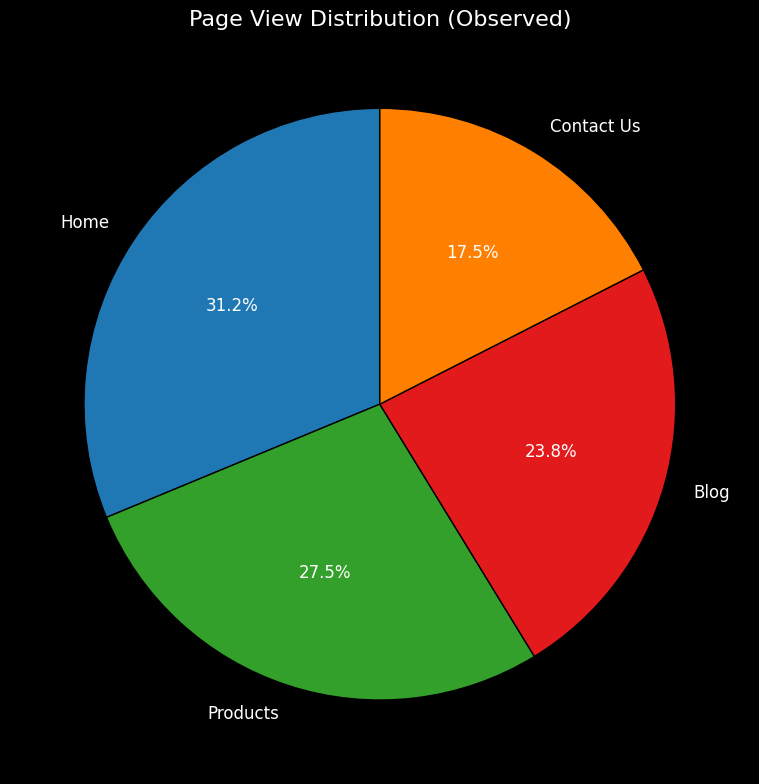

In [12]:
# Defining a color palette
dark_palette = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00']

plt.figure(figsize=(8, 8))
observed_views.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=dark_palette,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},  # Add black edges for better separation
    textprops={'color': 'white', 'fontsize': 12}  # Make labels white and larger
)
plt.title('Page View Distribution (Observed)', fontsize=16, color='white')
plt.ylabel('')  # Hide y-label for pie chart
plt.tight_layout()

plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.show()


In [9]:
# Calculate Expected Frequencies based on H₀ (uniform distribution)
expected_proportions = [0.25, 0.25, 0.25, 0.25]
expected_views = total_views * np.array(expected_proportions)
expected_views_series = pd.Series(expected_views, index=observed_views.index)

print("\nExpected Page Views (under H₀):")
print(expected_views_series)


Expected Page Views (under H₀):
Home          1000.0
Products      1000.0
Blog          1000.0
Contact Us    1000.0
dtype: float64


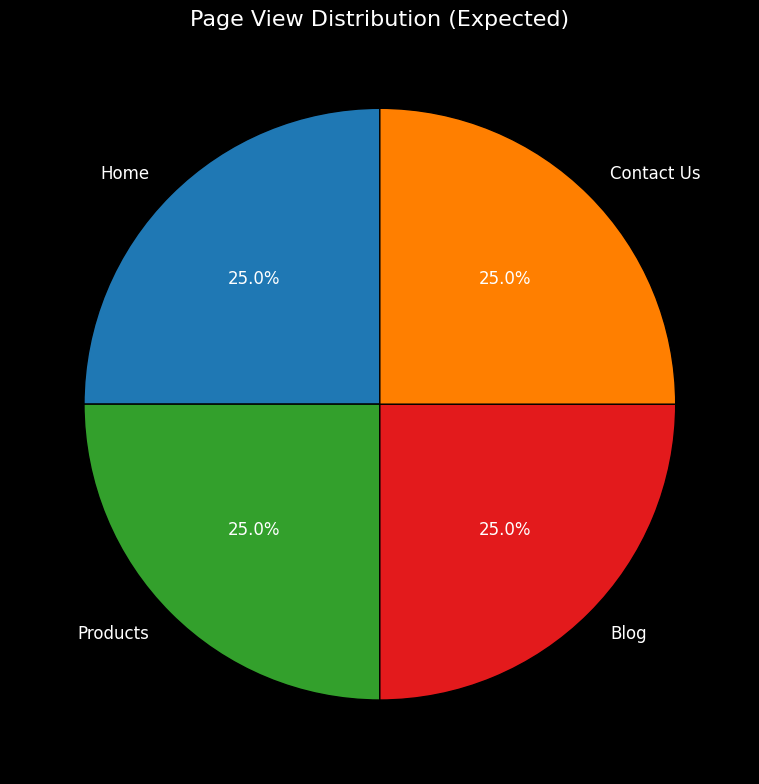

In [14]:
plt.figure(figsize=(8, 8))
expected_views_series.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=dark_palette,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},  # Add black edges for better separation
    textprops={'color': 'white', 'fontsize': 12}  # Make labels white and larger
)
plt.title('Page View Distribution (Expected)', fontsize=16, color='white')
plt.ylabel('')  # Hide y-label for pie chart
plt.tight_layout()

plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.show()

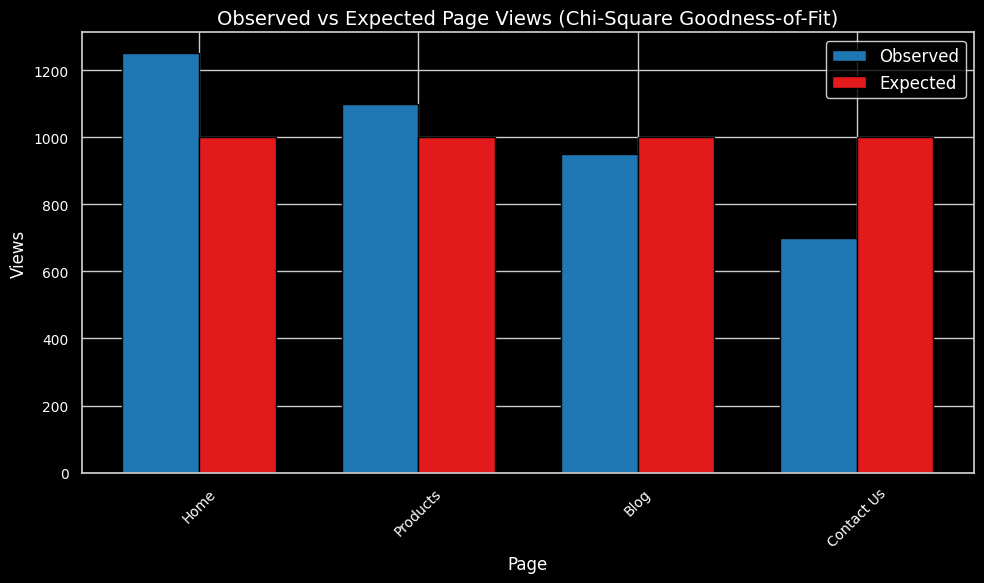

In [11]:
# Plot Observed vs Expected Side-by-Side
# Defining a color palette
color_palette = ['#1f78b4', '#e31a1c']

# Create the bar chart with the dark palette
plt.figure(figsize=(10, 6))
width = 0.35  # Width of the bars
x = np.arange(len(observed_views))

plt.bar(x - width/2, observed_views.values, width, label='Observed', color=color_palette[0], edgecolor='black')
plt.bar(x + width/2, expected_views_series.values, width, label='Expected', color=color_palette[1], edgecolor='black')

plt.xlabel('Page', fontsize=12, color='white')
plt.ylabel('Views', fontsize=12, color='white')
plt.title('Observed vs Expected Page Views (Chi-Square Goodness-of-Fit)', fontsize=14, color='white')  # Increased title fontsize and color
plt.xticks(x, observed_views.index, rotation=45, color='white', fontsize=10)  # Increased tick fontsize and color
plt.yticks(color='white', fontsize=10)
plt.legend(fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')  # Increased legend fontsize and color

plt.tight_layout()

# Add a black background to the chart
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.show()


### **5.4. Assumption Check**

The main assumption for Chi-Square GoF is that expected frequencies in each category should be reasonably large (typically >= 5).

In [49]:
print("\n--- Assumption Check (Chi-Square GoF) ---")
min_expected = expected_views.min()
print(f"Minimum Expected Frequency: {min_expected:.2f}")
if min_expected >= 5:
    print("Assumption met: All expected frequencies are >= 5.")
    gof_assumption_met = True
else:
    print("Warning: Assumption not met. Some expected frequencies are < 5. Consider combining categories if appropriate.")
    gof_assumption_met = False


--- Assumption Check (Chi-Square GoF) ---
Minimum Expected Frequency: 1000.00
Assumption met: All expected frequencies are >= 5.


### **5.5. Performing Chi-Square Goodness-of-Fit Test**

In [50]:
print("\n--- Performing Chi-Square Goodness-of-Fit Test ---")
if gof_assumption_met:
    # `chisquare` needs observed counts and *optionally* expected counts (f_exp).
    # If f_exp is not given, it assumes a uniform distribution.
    chi2_stat_gof, p_value_gof = stats.chisquare(
        f_obs=observed_views.values,
        f_exp=expected_views # Provide the calculated expected values
    )
    print(f"Chi-Square Statistic: {chi2_stat_gof:.4f}")
    print(f"P-value: {p_value_gof:.4f}")
else:
    print("Cannot reliably perform Chi-Square GoF test due to low expected frequencies.")
    p_value_gof = 1.0 # Set p-value high to indicate failure to proceed


--- Performing Chi-Square Goodness-of-Fit Test ---
Chi-Square Statistic: 165.0000
P-value: 0.0000


### **5.6. Interpretation**

In [51]:
print("\n--- Interpretation (Chi-Square GoF) ---")
if gof_assumption_met:
    if p_value_gof < alpha:
        print(f"Conclusion: Reject the Null Hypothesis (H₀).")
        print(f"There is a statistically significant difference (at α={alpha}) between the observed distribution of website traffic and the expected uniform distribution.")
        print("The traffic is not evenly distributed across the four sections as hypothesized.")
    else:
        print(f"Conclusion: Fail to Reject the Null Hypothesis (H₀).")
        print(f"There is not enough statistically significant evidence (at α={alpha}) to conclude that the observed distribution of website traffic differs from the expected uniform distribution.")
        print("The data is consistent with traffic being evenly distributed.")
else:
    print("Interpretation cannot be made due to unmet assumptions.")


--- Interpretation (Chi-Square GoF) ---
Conclusion: Reject the Null Hypothesis (H₀).
There is a statistically significant difference (at α=0.05) between the observed distribution of website traffic and the expected uniform distribution.
The traffic is not evenly distributed across the four sections as hypothesized.


# ---**End of Comprehensive Hypothesis Tests Notebook**---